# Part 1: Predict the price of a house .

        Using more than one model, predict the price of the house using the given dataset. Please compare the accuracy of the models along with the drawbacks of each technique's assumptions before recommending the final prediction model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#regression models
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [3]:
# read data
df=pd.read_excel(r'E:\shack labs\DS - Assignment Part 1 data set.xlsx')

In [4]:
# head
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [5]:
#shape of data
df.shape

(414, 9)

In [6]:
# feature info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [7]:
# data description 
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [8]:
#null values
df.isna().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [9]:
# duplicates
df.duplicated().sum()

0

# EDA
        ~ to get to know about the data and the main goal i.e. understand the relationship between house features and how these variables affect the house price

C:\Users\Ajay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'No. of transactions in years')

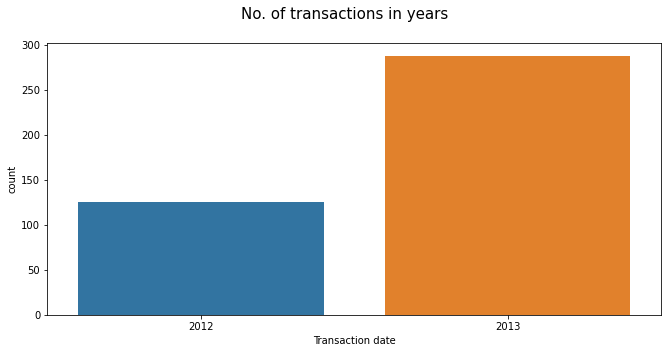

In [10]:
# no. of Transactions in years
plt.figure(figsize=(11,5))
sns.countplot(df['Transaction date'].astype('int'))
plt.suptitle('No. of transactions in years',fontsize=15)

Text(0.5, 0.98, 'Relation b/w house_age and house_price')

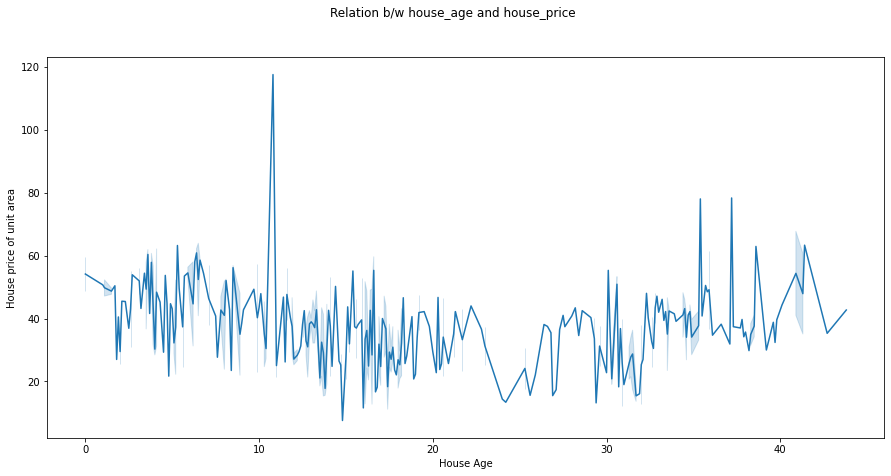

In [11]:
# relationship between house_age and price of house
plt.figure(figsize=(15,7))
sns.lineplot(x='House Age',y='House price of unit area',data=df)
plt.suptitle('Relation b/w house_age and house_price')

<AxesSubplot:xlabel='House Age', ylabel='House price of unit area'>

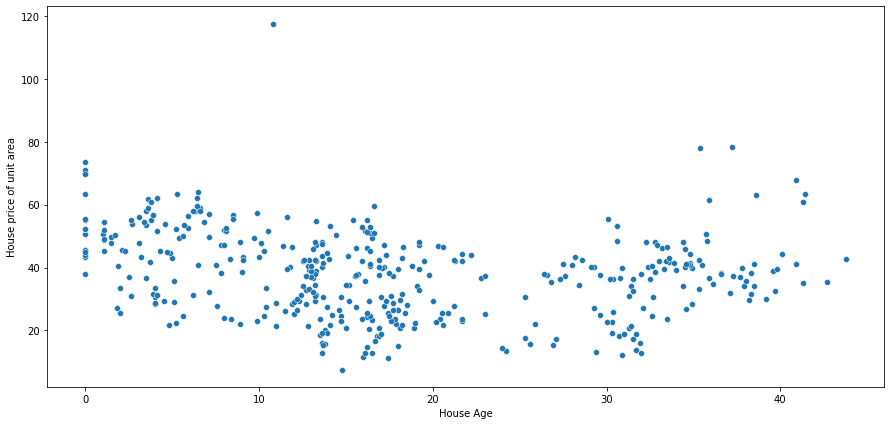

In [12]:
#same on scatter plot
plt.figure(figsize=(15,7))
sns.scatterplot(x='House Age',y='House price of unit area',data=df)

<AxesSubplot:xlabel='Distance from nearest Metro station (km)', ylabel='House price of unit area'>

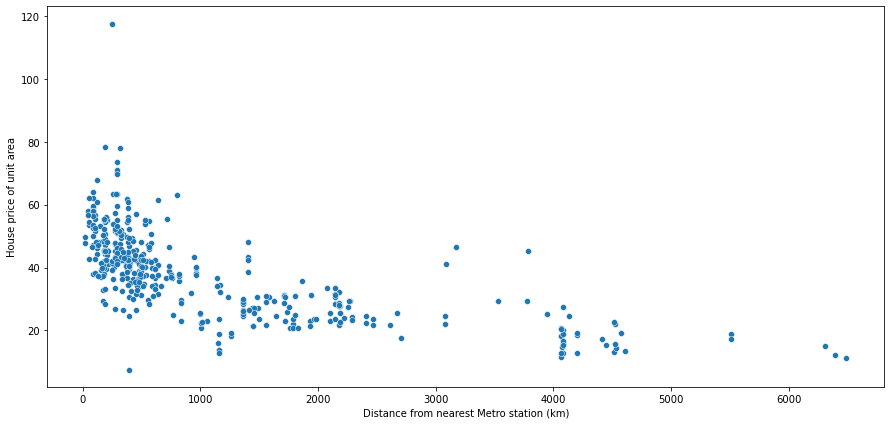

In [13]:
# relation between Distance from nearest Metro station (km) and house price.

plt.figure(figsize=(15,7))
sns.scatterplot(x='Distance from nearest Metro station (km)',y='House price of unit area',data=df)

            Lower the distance of house from metro station, higher the price ,kind of inverse relation .

<AxesSubplot:xlabel='Number of convenience stores', ylabel='House price of unit area'>

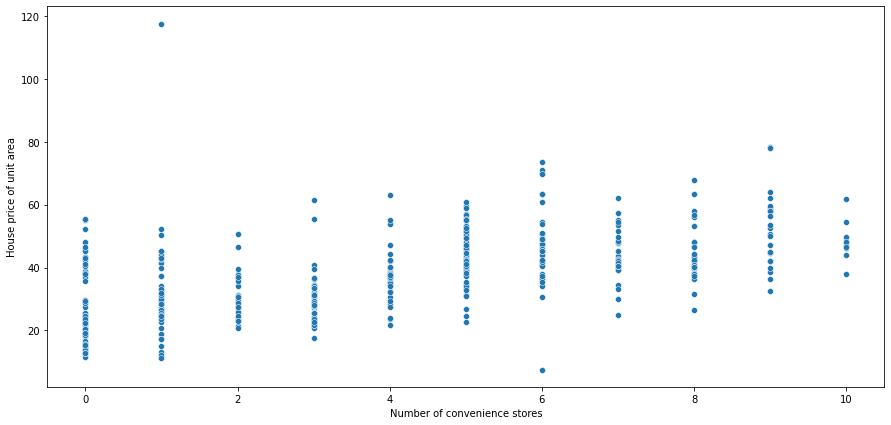

In [14]:
# relation between Number of convenience stores and House price of unit area.
plt.figure(figsize=(15,7))
sns.scatterplot(x='Number of convenience stores',y='House price of unit area',data=df)

<AxesSubplot:xlabel='Number of bedrooms', ylabel='House price of unit area'>

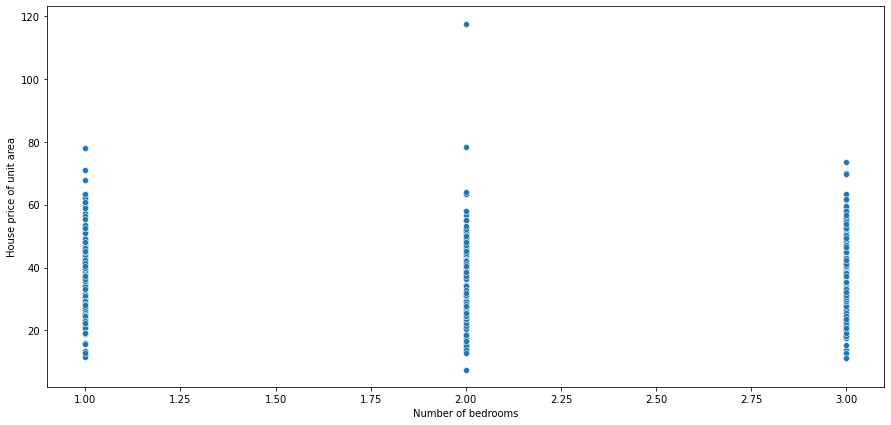

In [15]:
# relatipn between Number of bedrooms and house prices
plt.figure(figsize=(15,7))
sns.scatterplot(x='Number of bedrooms',y='House price of unit area',data=df)

<AxesSubplot:xlabel='House size (sqft)', ylabel='House price of unit area'>

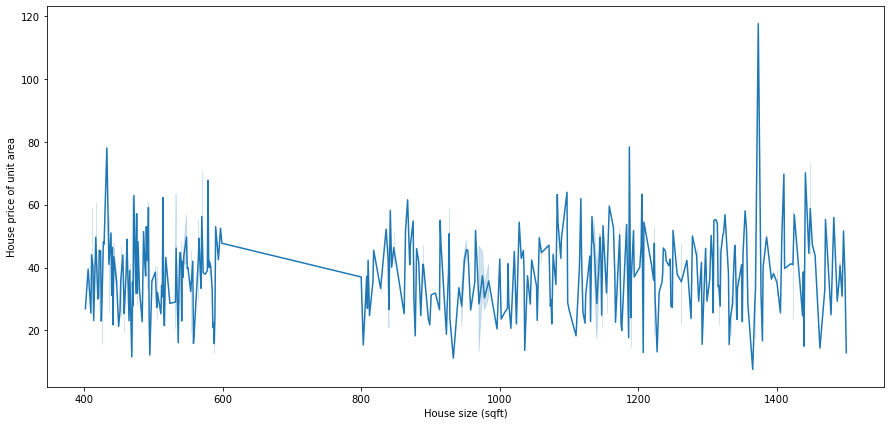

In [16]:
# relation between House size (sqft) and house price
plt.figure(figsize=(15,7))
sns.lineplot(x='House size (sqft)',y='House price of unit area',data=df)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

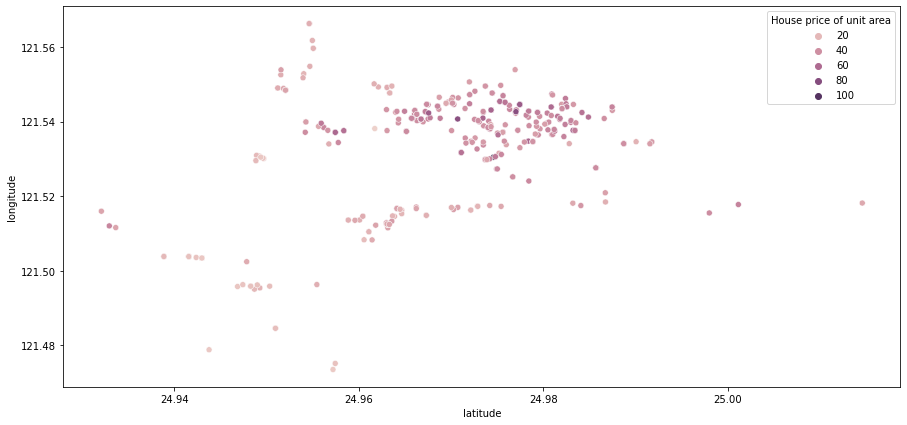

In [17]:
#house zones with prices
plt.figure(figsize=(15,7))
sns.scatterplot(x='latitude',y='longitude',data=df,hue='House price of unit area')

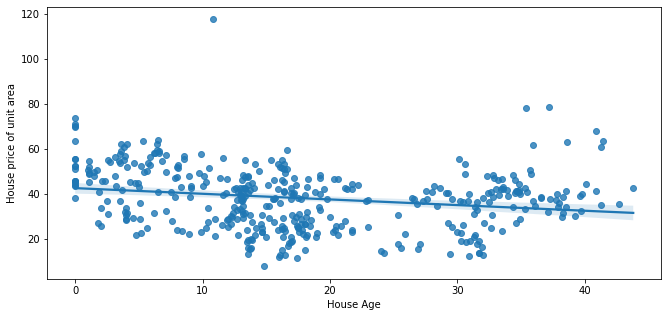

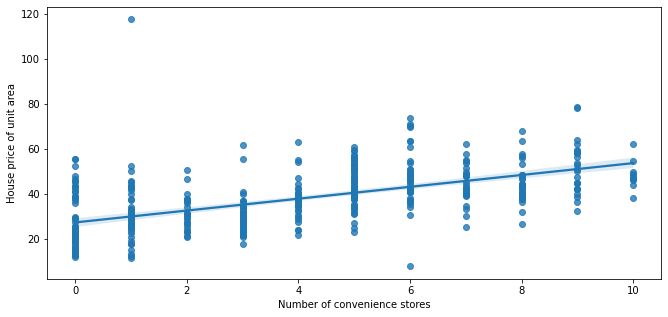

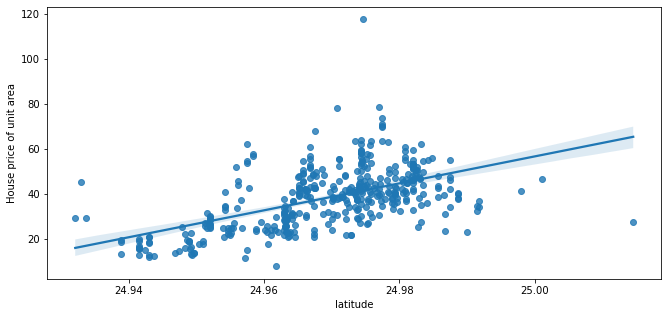

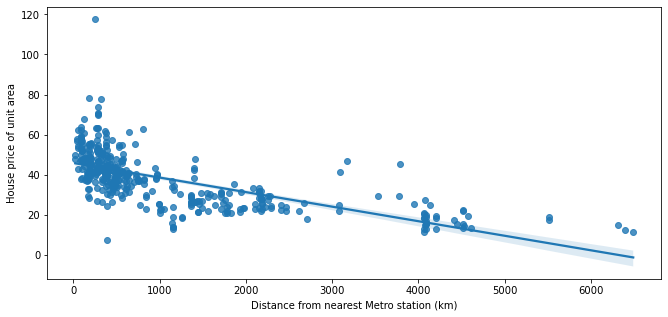

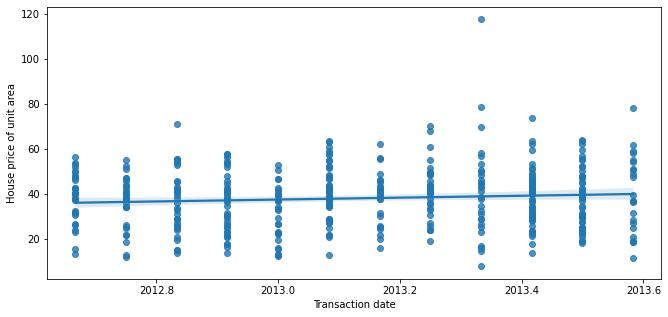

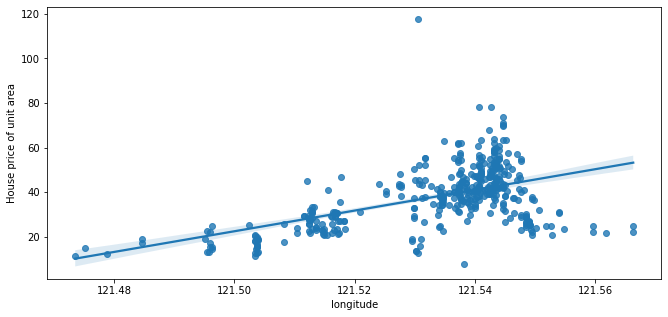

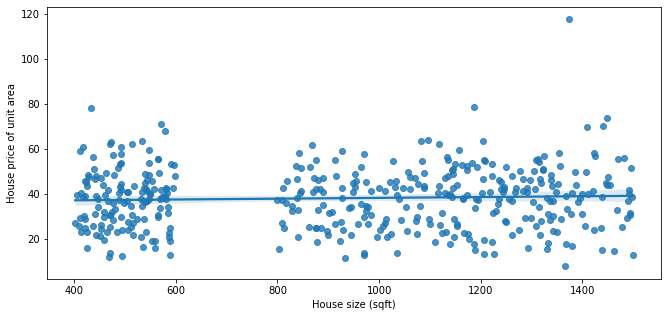

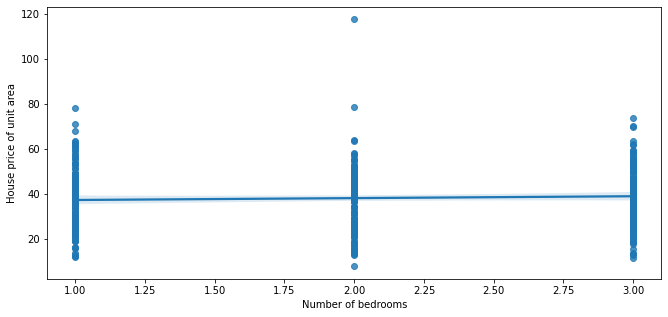

In [18]:
# let's plot linear relationship between dependent and each independent variable
for i ,j in enumerate(set(df.columns)-{'House price of unit area'}):
    plt.figure(figsize=(11,5))
    plt.figure(i+1)
    sns.regplot(data=df,x=j,y='House price of unit area')

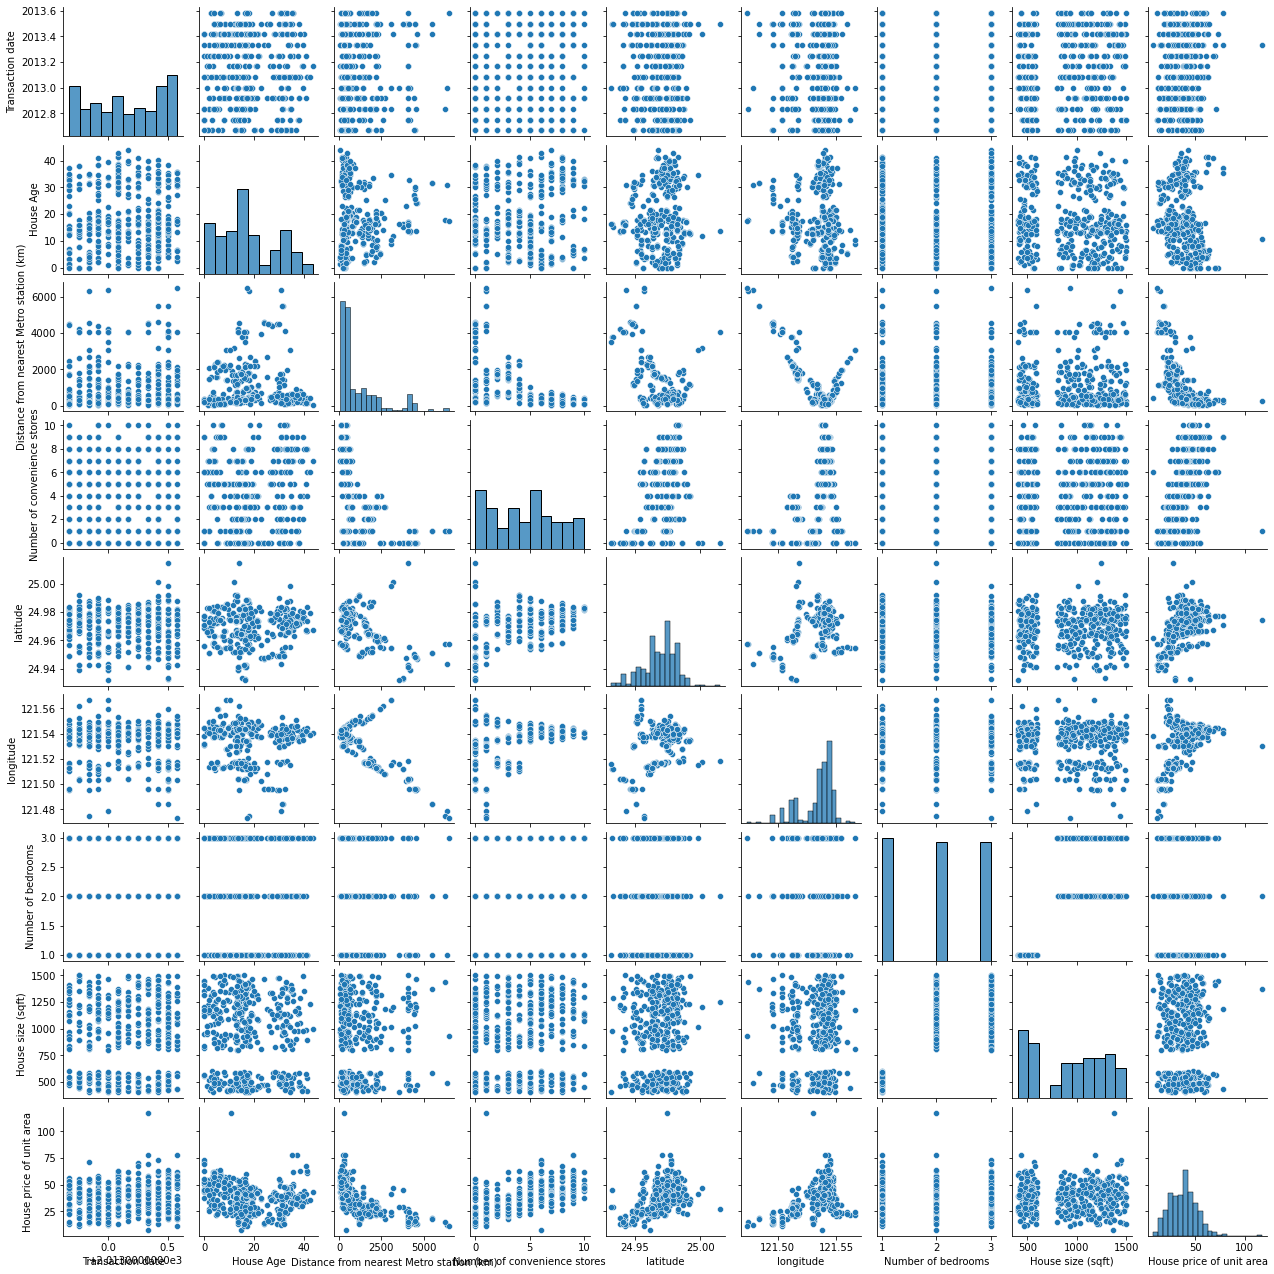

In [19]:
#pairplot
sns.pairplot(data=df,height=2)

C:\Users\Ajay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='House price of unit area', ylabel='Density'>

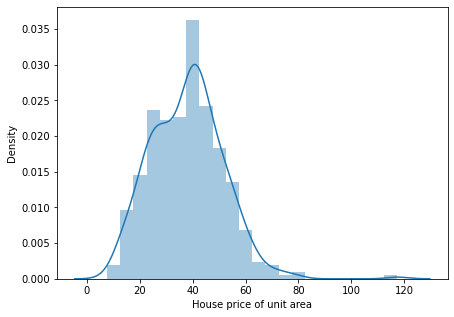

In [20]:
# let's plot out independent variable
plt.figure(figsize=(7,5))
sns.distplot(df['House price of unit area'])

        A little positive skewed 

In [21]:
# create x and y
x=list(set(df.columns)-{'House price of unit area','Transaction date'})
y='House price of unit area'

<AxesSubplot:>

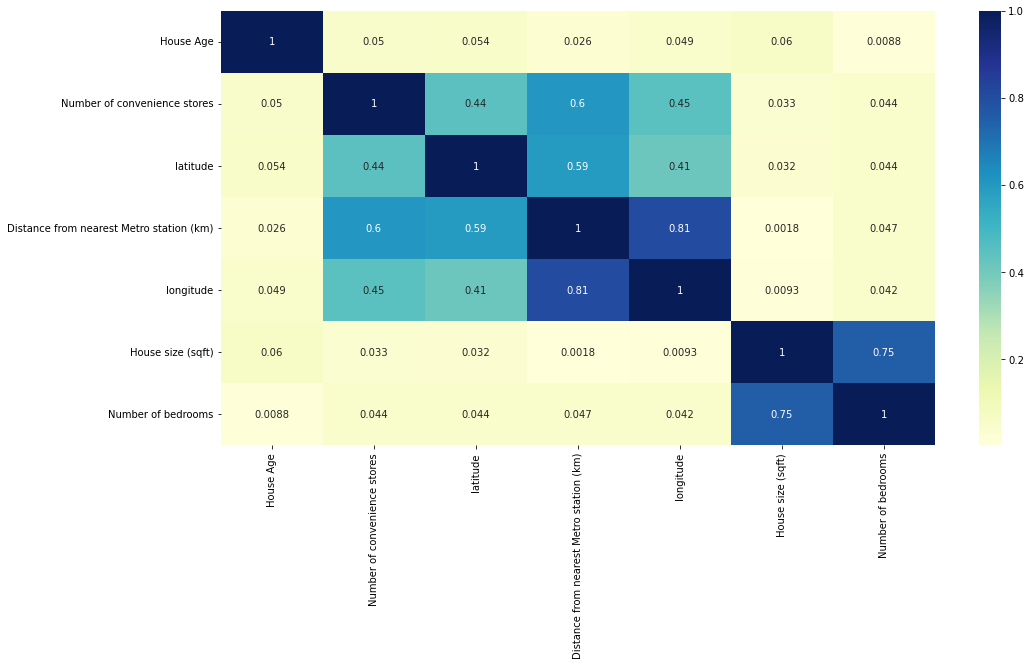

In [22]:
# Multicolinearity check

plt.figure(figsize=(16,8))
corr=df[x].corr()
sns.heatmap(abs(corr),annot=True,cmap='YlGnBu')

        1. Longitude and distance from nearest metro station have high corrleation,we can remove one of them.
        2. Number of bedrooms and House size(sqft) also have high correlation,we will choose only one of them.

<AxesSubplot:>

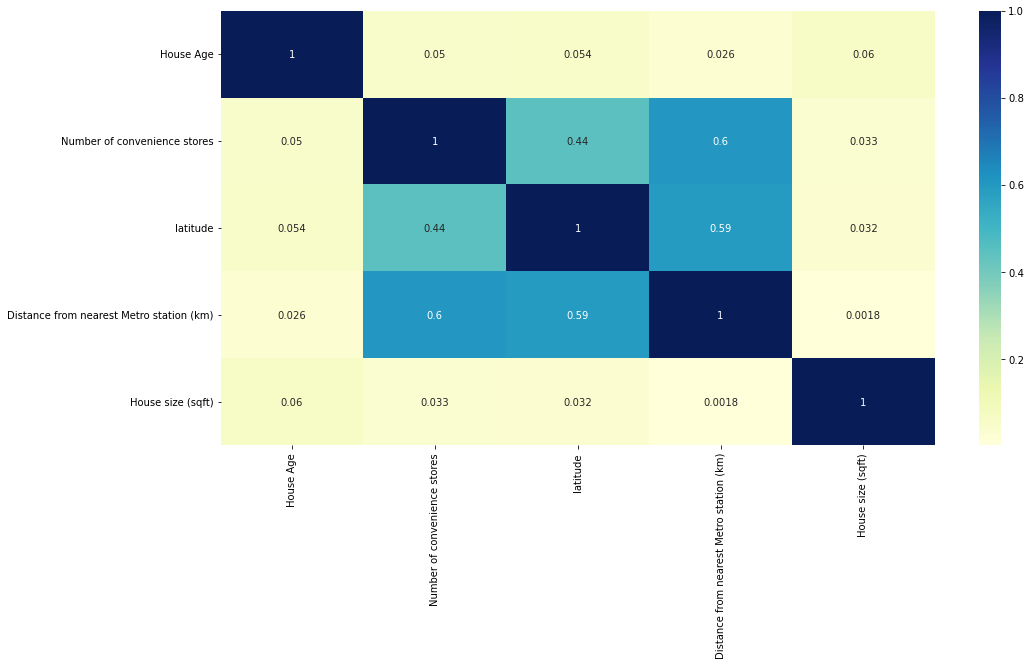

In [23]:
# let's plot again
x=list(set(x)-{'longitude','Number of bedrooms'})
plt.figure(figsize=(16,8))
corr=df[x].corr()
sns.heatmap(abs(corr),annot=True,cmap='YlGnBu')

In [24]:
# let's do normalization
scaler=MinMaxScaler()

# first devide our data into x and y
x=list(set(df.columns)-{'House price of unit area','Transaction date'})
y='House price of unit area'


#let;s scale 
X=scaler.fit_transform(df[x])


In [25]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(X,df[y],test_size=0.1,random_state=0)  #(keeping test size low as we don't have that much data)

**Let's apply Regression Models**

**1.Linear_Regression**\
*Assumptions :*\
                1. Linear relationship between independent and dependent variable (as we have also regplot,where there is a linear relation bewteen house size and house price, and also same with  Number of convenience stores ,distance of house from metro station .)\
                2.No relationship between independent variables(as we have also done multi-colinearity check)\
                3.Homoscedasticity (no constant error)
            

*Note :First we will train all the model and  will then compare Accuracy of all  models*

In [26]:
# let's apply Linear Regression
lr=LinearRegression()
#fit
lr.fit(x_train,y_train)

LinearRegression()

**2. Bagging :Random_Forest_Regressor**\
*Assumptions :*\
1. Random Forest is non parametric model,therefore no need to make any assumptions or we can say that its an advantage of bagging techniques.

**(Note)** All the model training will be simple ,there will no hyperparameter tuning.

In [28]:
#let's train our data

#initiate class
rf=RandomForestRegressor()
#fit
rf.fit(x_train,y_train)

RandomForestRegressor()

**3.Boosting :Gradient Boost Regressor**\
*Assumptions*:\
1. It is also a non parameteric model therefore no need to make any assumptions

In [29]:
#let's train 
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

**4. KNN Regressor**\
*Assumptions:*\
1.It is also a non-parametric model,therefore it doesn't make any assumption before application

In [49]:
# let's trainn KNN Regressor
knn=KNeighborsRegressor()
#fit
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [50]:

# Let's compare the accuracy
dic=dict()
loss=['R2_score','MSE','MAE','RMSE']

# R2_score of all models
    #linear regression
dic['Linear Regression']=list([r2_score(y_test,lr.predict(x_test)),mean_squared_error(y_test,lr.predict(x_test)),mean_absolute_error(y_test,lr.predict(x_test)),np.sqrt(mean_squared_error(y_test,lr.predict(x_test)))])
    #random forest regressor
dic['Random Forest Regressor']=list([r2_score(y_test,rf.predict(x_test)),mean_squared_error(y_test,rf.predict(x_test)),mean_absolute_error(y_test,rf.predict(x_test)),np.sqrt(mean_squared_error(y_test,lr.predict(x_test)))])
    # Gradient Boosting Regressor
dic['GB Regressor']=list([r2_score(y_test,gbr.predict(x_test)),mean_squared_error(y_test,gbr.predict(x_test)),mean_absolute_error(y_test,gbr.predict(x_test)),np.sqrt(mean_squared_error(y_test,lr.predict(x_test)))])
dic['KNN']=list([r2_score(y_test,knn.predict(x_test)),mean_squared_error(y_test,knn.predict(x_test)),mean_absolute_error(y_test,knn.predict(x_test)),np.sqrt(mean_squared_error(y_test,knn.predict(x_test)))])

In [52]:
#convert dic into DataFrame
models=pd.DataFrame(dic,index=loss)

In [53]:
#models
models

,Linear Regression,Random Forest Regressor,GB Regressor,KNN
R2_score,0.576900,0.539748,0.419956,0.482516
MSE,54.751928,59.559592,75.061408,66.965733
MAE,5.522694,5.592976,5.647408,5.861905
RMSE,7.399455,7.399455,7.399455,8.183259


# Recommendation with reasons:

        As you can see in above table ,we are getting maximum accuracy on Linear Regression also MSE and MAE are least,if we would have more data ,the accuracy would have been good.
        Some point we can consider before selection of a model :
        
        1. There is a linear relation between dependent and independent variable so we can go with Linear Regression.
        
        2. There is no coorelation between independent variable as we have removed them while data preprocessing so again we can go with Linear Regression but if you are working, where time matters and if you do not want to waste time on data preprocessing like normalization or mulit-colinearity check ,then non-parametric models are preferred ,they even performs very well and they are robust to exceptions like outliers ,multicolinearity and null values etc.
        
       3.The drawbacks of non parametrics models like Decision Tree ,Random Forest or KNN are ,that they tend to overfit the training data,there are always chances of high variance but theses models also have numbers of hyper parameters which one can tune. 
       4. Parametric models also works on less data as you can see in above table ,linear_regression has performed as compare to other models.
       
       5. Therefore with the data we have and the amount of data we have, we will go with Linear Regression.

**Part 1 has been completed**

# Part 2: Product Matching 
            ~Using ML/DL techniques, match similar products from the Flipkart dataset with the Amazon dataset. Once
            similar products are matched, display the retail price from FK and AMZ side by side. Please explore as
            many techniques as possible before choosing the final technique.
            You may either display the final result in single table format OR You may create a simple form where we
            input the product name and the output of prices of the product from both websites are displayed

In [2]:
#libraries
import string 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [3]:
#reading data
amazon=pd.read_csv(r'D:\shack labs\part2\amz_com-ecommerce_sample.csv',encoding='latin')
flipkart=pd.read_csv(r'D:\shack labs\part2\flipkart_com-ecommerce_sample.csv',encoding='latin')

In [4]:
# amazon
amazon.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,982,438,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32143,29121,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,991,551,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."


In [5]:
#flipkart
flipkart.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."


In [6]:
#data shapes
print('amazon :',amazon.shape)
print('flipkart :',flipkart.shape)

amazon : (20000, 15)
flipkart : (20000, 15)


        Both dataframe are of same size.

In [7]:
# amazon info
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   uniq_id                  20000 non-null  object
 1   crawl_timestamp          20000 non-null  object
 2   product_url              20000 non-null  object
 3   product_name             20000 non-null  object
 4   product_category_tree    20000 non-null  object
 5   pid                      20000 non-null  object
 6   retail_price             20000 non-null  int64 
 7   discounted_price         20000 non-null  int64 
 8   image                    19997 non-null  object
 9   is_FK_Advantage_product  20000 non-null  bool  
 10  description              19998 non-null  object
 11  product_rating           20000 non-null  object
 12  overall_rating           20000 non-null  object
 13  brand                    14136 non-null  object
 14  product_specifications   19986 non-nul

In [8]:
# flipkart info
flipkart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [9]:
# let's make dataframe of only those features ,that we are going to vectorize
amzn=amazon.loc[:,['product_name','product_category_tree','description','product_specifications']]
flipk=flipkart.loc[:,['product_name','product_category_tree','description','product_specifications']]

In [10]:
# sample amazon
amzn.sample(4)

,product_name,product_category_tree,description,product_specifications
5435,"Mee Mee Baby Boy's, Baby Girl's Romper","[""Baby Care >> Infant Wear >> Baby Boys' Cloth...","Key Features of Mee Mee Baby Boy's, Baby Girl'...","{""product_specification""=>[{""key""=>""Belt Inclu..."
19295,ADROITZ PREMIUM PHONE SOCKET HOLDER FOR LG CT8...,"[""Mobiles & Accessories >> Mobile Accessories ...",Key Features of AdroitZ Premium Phone Socket H...,"{""product_specification""=>[{""key""=>""Mount Type..."
14136,Nivia Solid Men's Polo Neck T-Shirt,"[""Clothing >> Men's Clothing >> T-Shirts >> Ni...",Nivia Solid Men's Polo Neck T-Shirt\n ...,"{""product_specification""=>[{""key""=>""Sleeve"", ""..."
17874,LITTLETHINGS COCONUT FRIDGE MAGNET,"[""Home Decor & Festive Needs >> Wall Decor & C...",Key Features of LittleThings Coconut Fridge Ma...,"{""product_specification""=>[{""key""=>""Brand"", ""v..."


In [11]:
#sample flipkart
flipk.sample(4)

,product_name,product_category_tree,description,product_specifications
19007,Blackberrys Printed Single Breasted Casual Men...,"[""Clothing >> Men's Clothing >> Suits & Blazer...",Key Features of Blackberrys Printed Single Bre...,"{""product_specification""=>[{""key""=>""Sleeve"", ""..."
522,Shilpi Casual Cape Sleeve Solid Women's Top,"[""Clothing >> Women's Clothing >> Western Wear...",Shilpi Casual Cape Sleeve Solid Women's Top - ...,"{""product_specification""=>[{""key""=>""Ideal For""..."
19494,Kaxiaa Women's Layered Dress,"[""Clothing >> Women's Clothing >> Western Wear...",Kaxiaa Women's Layered Dress - Buy Black Kaxia...,"{""product_specification""=>[{""value""=>""1 Dress""..."
17751,V3Squared V-neck Solid Men's Pullover,"[""Clothing >> Men's Clothing >> Winter & Seaso...",Key Features of V3Squared V-neck Solid Men's P...,"{""product_specification""=>[{""key""=>""Sleeve"", ""..."


            We could have taken feature='Brand' also but it has so many null values,so we will skip this.

In [12]:
# let's remove ull values 
amzn.dropna(inplace=True)
flipk.dropna(inplace=True)

In [13]:
# duplicates
print('Duplicates in Amazon :',amzn.duplicated().sum())
print('Duplicates in Flipkart :',flipk.duplicated().sum())

# remove them
amzn.drop_duplicates(inplace=True)
flipk.drop_duplicates(inplace=True)

Duplicates in Amazon : 373
Duplicates in Flipkart : 386


**Text Preprocessing**

In [14]:
# let' join first all the columns
amzn=pd.DataFrame(amzn.apply(lambda x:(x['product_name']+' '+''.join(x['product_category_tree'])+' '+x['description']+' '+x['product_specifications']),axis=1))
flipk=pd.DataFrame(flipk.apply(lambda x:(x['product_name']+' '+''.join(x['product_category_tree'])+' '+x['description']+' '+x['product_specifications']),axis=1))

In [15]:
# removing punctuation
amzn[0]=amzn[0].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))
flipk[0]=flipk[0].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))

In [16]:
# lower case
amzn[0]=amzn[0].apply(lambda x:x.lower())
flipk[0]=flipk[0].apply(lambda x:x.lower())

In [17]:
# removing  stopwords
amzn[0]=amzn[0].apply(lambda x:[i for i in x.split() if i not in stopwords.words('english')])
flipk[0]=flipk[0].apply(lambda x:[i for i in x.split() if i not in stopwords.words('english')])

In [18]:
# stemming
stemmer=PorterStemmer()
amzn[0]=amzn[0].apply(lambda x:' '.join([stemmer.stem(i) for i in x]))
flipk[0]=flipk[0].apply(lambda x:' '.join([stemmer.stem(i) for i in x]))

**Vectorization**

In [19]:
# we will make two vectorizer for vectorizing text
#amzn
vectorizer_1=TfidfVectorizer(max_features=1000)
#flipkaer
vectorizer_2=TfidfVectorizer(max_features=1000)

        Extracting features from text using Term Frequency Vectorizer

In [20]:
# saving vectors into dataframe
#amazon
amzn_vec=pd.DataFrame(vectorizer_1.fit_transform(amzn[0]).toarray(),index=amzn.index)

#flipkart
flipk_vec=pd.DataFrame(vectorizer_2.fit_transform(flipk[0]).toarray(),index=flipk.index)

In [21]:
# calculating neighbors

#initiate first
amzn_neighbors=NearestNeighbors(n_neighbors=5,algorithm='brute',metric='cosine') 
flipk_neighbors=NearestNeighbors(n_neighbors=5,algorithm='brute',metric='cosine') 

        It will calculate similarity between feature vector of prodcuts

In [115]:
amzn_neighbors.fit(amzn_vec)
flipk_neighbors.fit(flipk_vec)

NearestNeighbors(algorithm='brute', metric='cosine')

In [23]:
amzn_neighbors.kneighbors(np.array(np.array(flipk_vec.loc[0]).reshape(1,-1)))

(array([[0.21169225, 0.21544084, 0.21544084, 0.21577481, 0.21664673]]),
 array([[ 0, 13, 15,  6,  9]], dtype=int64))

In [151]:
# Let's make a function which will take product name as input and return a dataframe including details of similar product from both amazon and flipkart.
def compare(name):
    ind=[]
    if amazon[amazon['product_name'].isin([str(name)])].empty==False:
        ind.append('amazon')
        ind.append(amazon[amazon['product_name'].isin([str(name)])].index[0])
        
    elif flipkart[flipkart['product_name'].isin([str(name)])].empty==False:
        ind.append('flipkart')
        ind.append(flipkart[flipkart['product_name'].isin([str(name)])].index[0])
        
    else:
        print('Product not available !')
        
    # now we have got dataframe and its index
    #let's get the feature vector of the input product
    if ind[0]=='amazon':
        inp_vec=amzn_vec.iloc[ind[1],:]
    else:
        inp_vec=flipk_vec.iloc[ind[1],:]
    
    #now let's get indices of similar products from both dataframes
    amazon_indices=amzn_neighbors.kneighbors(np.array(inp_vec).reshape(1,-1))[1][0].tolist()
    flipkart_indices=flipk_neighbors.kneighbors(np.array(inp_vec).reshape(1,-1))[1][0].tolist()
    
    #let's get dataframes of both
    #amazon's
    amazon_price=amazon[amazon.index.isin(amazon_indices)][['product_name','retail_price','discounted_price']]
    amazon_price.columns=['(Amazon) product_name','(Amazon) retail_price','(Amazon) discounted_price']
    #flipkart's
    flipkart_price=flipkart[flipkart.index.isin(flipkart_indices)][['product_name','retail_price','discounted_price']]
    flipkart_price.columns=['(Flipkart) product_name','(Flipkart) retail_price','(Flipkart) discounted_price']
    
    
    #join both dataframes
    return amazon_price.reset_index(drop=True).join(flipkart_price.reset_index(drop=True))
    
    

In [152]:
#let's test function
compare("CHAZER RUNNING SHOES")

,(Amazon) product_name,(Amazon) retail_price,(Amazon) discounted_price,(Flipkart) product_name,(Flipkart) retail_price,(Flipkart) discounted_price
0,Karatcraft Spruzzi Yellow Gold Diamond 18 K Ring,23278,21312,Karatcraft Spruzzi Yellow Gold Diamond 18 K Ring,23284.0,17302.0
1,CHAZER RUNNING SHOES,378,478,Chazer Running Shoes,380.0,380.0
2,SCANTIA BELLIES,388,374,SCANTIA Bellies,399.0,299.0
3,CLOVIA WOMEN'S T-SHIRT BRA,341,351,Clovia Women's T-Shirt Bra,349.0,299.0
4,LITTLETHINGS COCONUT FRIDGE MAGNET,290,375,LittleThings Coconut Fridge Magnet,300.0,300.0


        Boom! Working great.

In [156]:
compare("FabHomeDecor Fabric Double Sofa Bed")

,(Amazon) product_name,(Amazon) retail_price,(Amazon) discounted_price,(Flipkart) product_name,(Flipkart) retail_price,(Flipkart) discounted_price
0,FabHomeDecor Fabric Double Sofa Bed,32143,29121,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0
1,FabHomeDecor Fabric Double Sofa Bed,32137,28664,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0
2,FabHomeDecor Fabric Double Sofa Bed,32150,28650,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0
3,FabHomeDecor Fabric Double Sofa Bed,32144,26423,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0
4,Miss Chase Casual Sleeveless Solid Women's Top,1587,1337,Miss Chase Casual Sleeveless Solid Women's Top,1599.0,1119.0
